In [99]:
import pandas as pd 

pd.options.display.max_columns = 114 
pd.options.display.max_rows = 87 

# Cleaning (cells conaining these words will be replaced by NaN)
na_vals = ['NA', 'Missing']

df = pd.read_csv('data/survey_results_public.csv', index_col="ResponseId", na_values=na_vals) # we've set index

schema_df = pd.read_csv('data/survey_results_schema.csv', index_col="qname")

# df.columns = df.columns.str.lower()

### Preview Data

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Columns: 113 entries, MainBranch to JobSat
dtypes: float64(13), object(100)
memory usage: 56.9+ MB


In [101]:
df.head(2)

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [102]:
schema_df.head()

,qid,question,force_resp,type,selector
qname,,,,,
MainBranch,QID2,Which of the following options best describes ...,True,MC,SAVR
Age,QID127,What is your age?*,True,MC,SAVR
Employment,QID296,Which of the following best describes your cur...,True,MC,MAVR
RemoteWork,QID308,Which best describes your current work situation?,False,MC,SAVR
Check,QID341,Just checking to make sure you are paying atte...,True,MC,SAVR


In [103]:
df.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=113)

In [104]:
df['SOAccount'].value_counts()

SOAccount
Yes                        45453
No                          9628
Not sure/can't remember     4479
Name: count, dtype: int64

In [105]:
df.loc[1] # same as df.iloc[0]

MainBranch             I am a developer by profession
Age                                Under 18 years old
Employment                        Employed, full-time
RemoteWork                                     Remote
Check                                          Apples
                                    ...              
JobSatPoints_11                                   NaN
SurveyLength                                      NaN
SurveyEase                                        NaN
ConvertedCompYearly                               NaN
JobSat                                            NaN
Name: 1, Length: 113, dtype: object

In [106]:
# df.loc[[1, 2, 3], ["SOAccount"]]
# df.iloc[0:2, 5:9]
df.loc[1:3, 'SOAccount':'AISent']

,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent
ResponseId,,,,,,
1,NaN,NaN,NaN,NaN,Yes,Very favorable
2,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN
3,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN


In [107]:
schema_df.loc['AISelect', 'question'] # schema_df.loc['AISelect'].question

# schema_df.sort_index()

'Do you currently use AI tools in your development process? *'

### ***Filter***

In [108]:
high_salary_filter = (
        (df['ConvertedCompYearly'] > 700000)
        & (df['Country'].isin(['United States of America', 'Canada', 'India']))
        & (df['LanguageHaveWorkedWith'].str.contains('HTML', na=False))
    )

# df[high_salary_filter]
df.loc[high_salary_filter, ['Age', 'Country', 'ConvertedCompYearly' ,'LanguageHaveWorkedWith']]

,Age,Country,ConvertedCompYearly,LanguageHaveWorkedWith
ResponseId,,,,
2172,35-44 years old,United States of America,750000.0,Bash/Shell (all shells);C#;Groovy;HTML/CSS;Jav...
2593,35-44 years old,United States of America,800000.0,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...
8920,35-44 years old,United States of America,950000.0,C;C#;C++;Fortran;HTML/CSS;Java;JavaScript;Obje...
9609,35-44 years old,United States of America,798000.0,HTML/CSS;JavaScript;Ruby;SQL;TypeScript
13343,45-54 years old,United States of America,1000000.0,Bash/Shell (all shells);HTML/CSS;Java;JavaScri...
14508,25-34 years old,United States of America,750000.0,HTML/CSS;JavaScript;PHP
19245,45-54 years old,United States of America,1200000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...
19268,25-34 years old,India,3367716.0,HTML/CSS;JavaScript;SQL
20729,35-44 years old,United States of America,750000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...


In [109]:
df.rename(columns={
    'ConvertedCompYearly': 'Salary $'
}, inplace=True)

df['Salary $'].head()

ResponseId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Salary $, dtype: float64

In [110]:
df['SOAccount'] = df['SOAccount'].replace({
    'Yes': True,
    'No': False
})

""" --> also works

df['SOAccount'] = df['SOAccount'].map({
    'Yes': True,
    'No': False
})

"""

df['SOAccount']

ResponseId
1          NaN
2         True
3         True
4        False
5         True
         ...  
65433      NaN
65434      NaN
65435      NaN
65436    False
65437     True
Name: SOAccount, Length: 65437, dtype: object

#### Dropping Columns

In [111]:
df.drop(columns=['EdLevel', 'PlatformWantToWorkWith'], inplace=True)

df.head(2)

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,Salary $,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,True,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,Na

### **Sorting**

In [112]:
df.sort_values(by=['Country', 'Salary $'], ascending=[True, False], inplace=True)

df[['Country', 'Salary $']].head(10)

,Country,Salary $
ResponseId,,
39346,Afghanistan,20000.0
37549,Afghanistan,11512.0
14673,Afghanistan,8634.0
6942,Afghanistan,6907.0
1566,Afghanistan,5940.0
14613,Afghanistan,3597.0
1241,Afghanistan,3279.0
9825,Afghanistan,719.0
38003,Afghanistan,83.0


### ***nlargest & nsmallest***

- Largest 10 salaries

In [113]:
df['Salary $'].nlargest(10)

ResponseId
15838    16256603.0
12724    13818022.0
28380     9000000.0
17594     6340564.0
17673     4936778.0
19268     3367716.0
23695     2584118.0
33721     2237846.0
34524     2153432.0
13764     2048046.0
Name: Salary $, dtype: float64

- Largest 10 salaries in India

In [114]:
india_filtr = df['Country'] == 'India'

df[india_filtr]['Salary $'].nlargest(10)

ResponseId
19268    3367716.0
34318    1500000.0
18603     500000.0
9915      430685.0
6706      358904.0
21192     250000.0
35050     222834.0
4705      220128.0
19388     197352.0
6065      135000.0
Name: Salary $, dtype: float64

- The largest 3 salaries of all developers

In [115]:
df.nlargest(3, 'Salary $')[['Salary $', 'Country']]

,Salary $,Country
ResponseId,,
15838,16256603.0,Ethiopia
12724,13818022.0,South Africa
28380,9000000.0,Taiwan


- The smallest 3 salaries of all developers

In [116]:
df.nsmallest(3, 'Salary $')[['Salary $', 'Country']]

,Salary $,Country
ResponseId,,
22246,1.0,Afghanistan
25201,1.0,Afghanistan
6103,1.0,Colombia


### ***Grouping and Aggregating***

In [117]:
# df.median()

- Median salary for developers that went through the survey (**Average is heavily affected by outliers**)

In [118]:
round(df['Salary $'].median())

65000

In [119]:
# df.describe()

In [120]:
df['SOAccount'].value_counts()

SOAccount
True                       45453
False                       9628
Not sure/can't remember     4479
Name: count, dtype: int64

<Axes: xlabel='DevType'>

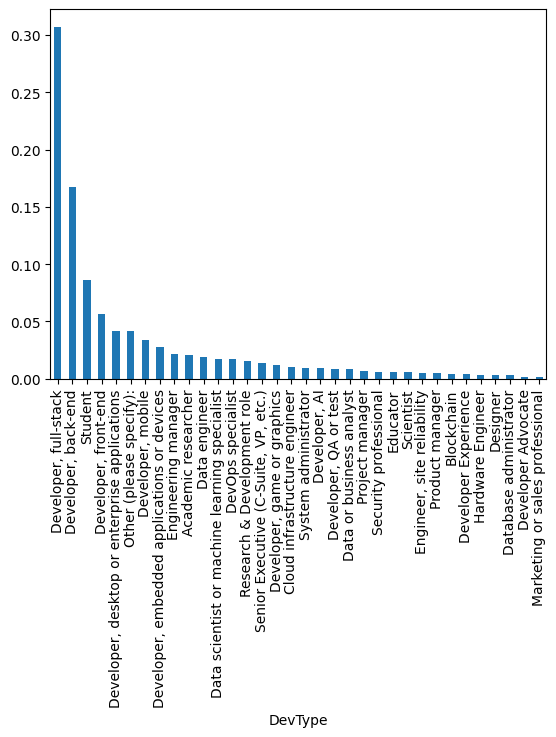

In [121]:
# schema_df.loc['DevType'].question

df['DevType'].value_counts(normalize=True).plot(kind='bar') # All countries

In [122]:
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Nauru                                                       1
Dominica                                                    1
Guinea                                                      1
Lesotho                                                     1
Haiti                                                       1
Name: count, Length: 185, dtype: int64

- ***Group by*** (Country)

In [123]:
countryGroupBy_DF = df.groupby(by='Country')

countryGroupBy_DF

In [124]:
countryGroupBy_DF.get_group('United States of America').head(2)

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,Salary $,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36330,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Contribute to open-source projects,"Books / Physical media;School (i.e., Universit...",NaN,NaN,21,12,"Developer, back-end","10,000 or more employees",I have a great deal of influence,NaN,NaN,Reputation for quality and excellence,United States of America,USD\tUnited States dollar,1900000.0,C++;Python;Rust,Rust,Rust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Helix;Vim;Visual Studio Code,Helix;Vim,Helix;Vim,ChromeOS;Ubuntu,Fedora;Red Hat,NaN,NaN,NaN,Discord;Jitsi;Zulip,Jitsi;Zulip,Jitsi;Zulip,NaN,NaN,NaN,Stack Overflow;Stack Exchange,Daily or almost daily,True,Less than once per month or monthly,NaN,"No, not at all","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,11.0,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Agree,Disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,30-60 minutes a day,Amount of technical debt;Reliability of tools/...,DevOps function;Automated testing;Observabilit...,On-prem,Traditional public search engine,"Internet, Telecomm or Information Services",25.0,40.0,0.0,25.0,0.0,0.0,10.0,0.0,0.0,Appropriate in length,Easy,1900000.0,10.0
33001,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Freelance/contract work,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,API document(s) and/or SDK document(s);User gu...,8,3,"Developer, back-end",20 to 99 employees,I have little or no influence,Ask developers I know/work with;Visit develope...,Out-of-the-box is ready to go with little need...,APIs;Reputation for quality and excellence,United States of America,USD\tUnited States dollar,1750000.0,Bash/Shell (all shells);Go;Kotlin;Python;Rust;...,Swift,NaN,Cockroachdb;Elasticsearch;EventStoreDB,NaN,NaN,Amazon Web Services (AWS);Google Cloud;Microso...,NaN,Next.js;React,NaN,NaN,NaN,NaN,NaN,React Native,N

<Axes: xlabel='DevType'>

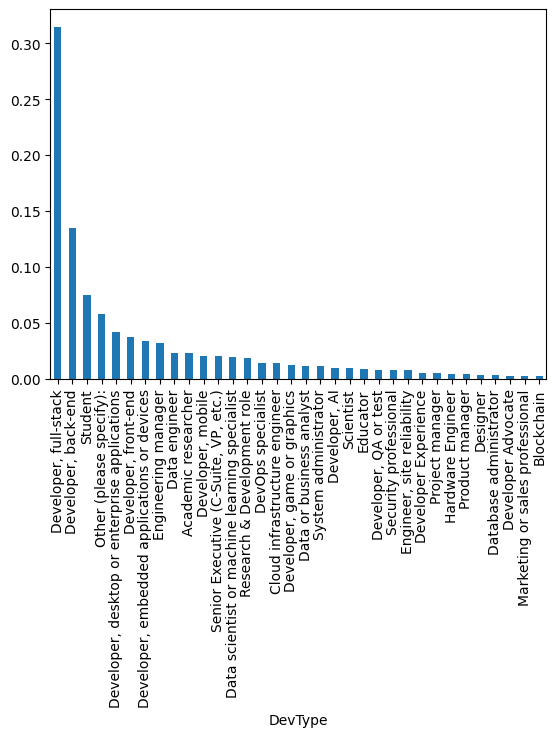

In [125]:
countryGroupBy_DF.get_group('United States of America')['DevType'].value_counts(normalize=True).plot(kind='bar')

- ***just like a filter*** (but we won't create filter for every country)

In [126]:
# filt = df['Country'] == 'India'
# df.loc[filt]['DevType'].value_counts()

In [127]:
# countryGroupBy_DF['DevType'].value_counts()
countryGroupBy_DF['DevType'].value_counts().loc['India']

DevType
Developer, full-stack                            1276
Developer, back-end                               671
Student                                           659
Developer, front-end                              309
Developer, mobile                                 247
Developer, desktop or enterprise applications     104
Other (please specify):                           104
Data engineer                                      82
Data scientist or machine learning specialist      80
Developer, AI                                      59
Research & Development role                        54
Developer, embedded applications or devices        53
DevOps specialist                                  52
Engineering manager                                52
Project manager                                    42
Developer, QA or test                              41
Senior Executive (C-Suite, VP, etc.)               39
Academic researcher                                36
Cloud infrastructure

- ***Median salary for each country***

In [128]:
countryGroupBy_DF['Salary $'].median()

Country
Afghanistan                               3438.0
Albania                                  35341.0
Algeria                                   7120.0
Andorra                                 123517.0
Angola                                    1754.0
                                          ...   
Venezuela, Bolivarian Republic of...     10800.0
Viet Nam                                 12288.5
Yemen                                     5333.0
Zambia                                    2280.0
Zimbabwe                                 18000.0
Name: Salary $, Length: 185, dtype: float64

- for Morocco for example

In [129]:
countryGroupBy_DF['Salary $'].median().loc['Morocco']

10251.0

In [130]:
mean_vs_median = countryGroupBy_DF['Salary $'].agg(['mean', 'median'])

mean_vs_median['mean'] = round(mean_vs_median['mean'])

mean_vs_median

# for Canada
# mean_vs_median.loc['Canada']

,mean,median
Country,,
Afghanistan,5057.0,3438.0
Albania,39208.0,35341.0
Algeria,91837.0,7120.0
Andorra,123517.0,123517.0
Angola,1366.0,1754.0
...,...,...
"Venezuela, Bolivarian Republic of...",20137.0,10800.0
Viet Nam,18803.0,12288.5
Yemen,16498.0,5333.0


- the number of developers from Zimbabwe have said that they worked with python **(Using filters)**

<Axes: ylabel='proportion'>

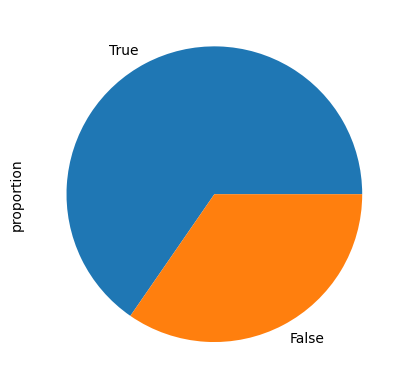

In [131]:
india_filter = df['Country'] == 'Zimbabwe'

df.loc[india_filter]['LanguageHaveWorkedWith'].str.contains('Python', na=False).value_counts(normalize=True).plot(kind='pie')

- the number of developers from Zimbabwe have said that they worked with python **(Using GroupBy)**

<Axes: ylabel='proportion'>

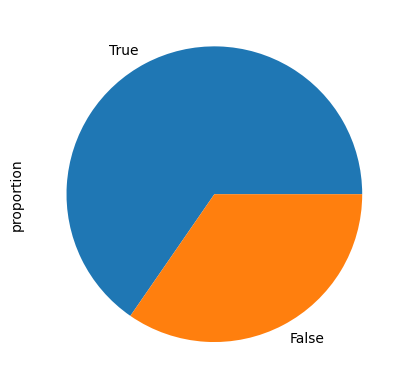

In [132]:
# countryGroupBy_DF['LanguageHaveWorkedWith'].get_group('Zimbabwe').str.contains('Python', na=False).value_counts(normalize=True).plot(kind='pie')

# same as
countryGroupBy_DF.get_group('Zimbabwe')['LanguageHaveWorkedWith'].str.contains('Python', na=False).value_counts(normalize=True).plot(kind='pie')

- For all countries

In [133]:
countryGroupBy_DF['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('Python', na=False).value_counts(normalize=True))

Country           
Afghanistan  False    0.535714
             True     0.464286
Albania      False    0.795918
             True     0.204082
Algeria      False    0.519481
                        ...   
Yemen        False    0.444444
Zambia       True     0.533333
             False    0.466667
Zimbabwe     True     0.653846
             False    0.346154
Name: LanguageHaveWorkedWith, Length: 349, dtype: float64

# Casting

In [134]:
df['YearsCode'].unique()

array(['10', '6', '12', '7', '2', '25', '8', '5', '3',
       'More than 50 years', nan, 'Less than 1 year', '1', '9', '13',
       '11', '20', '4', '24', '14', '23', '40', '15', '22', '18', '33',
       '35', '27', '19', '39', '36', '34', '21', '16', '17', '30', '38',
       '28', '42', '37', '26', '44', '32', '45', '43', '41', '29', '31',
       '50', '46', '47', '48', '49'], dtype=object)

In [135]:
df['YearsCode'] = df['YearsCode'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '50'
})

# it will automatically be converted to 'float' if we passed in float values (0 and 50) and not string as we did

df['YearsCode'].unique()

array(['10', '6', '12', '7', '2', '25', '8', '5', '3', '50', nan, '0',
       '1', '9', '13', '11', '20', '4', '24', '14', '23', '40', '15',
       '22', '18', '33', '35', '27', '19', '39', '36', '34', '21', '16',
       '17', '30', '38', '28', '42', '37', '26', '44', '32', '45', '43',
       '41', '29', '31', '46', '47', '48', '49'], dtype=object)

In [136]:
df['YearsCode'].dtype

dtype('O')

In [137]:
df['YearsCode'] = df['YearsCode'].astype(float)

In [138]:
df['YearsCode'].dtype

dtype('float64')

In [139]:
print('mean: ', df['YearsCode'].mean())
print('median: ', df['YearsCode'].median())

mean:  14.193255274014932
median:  11.0
